In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

In [ ]:
# Load the dataset
path="/content/drive/MyDrive/Lab3/Rice_Dataset_Commeo_and_Osmancik/Rice_Cammeo_Osmancik.xlsx"
df = pd.read_excel(path)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [ ]:
# Split the dataset into features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Calculate the evaluation metrics
confusion_mat = confusion_matrix(y_test, y_pred, labels=['Cammeo', 'Osmancik'])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Cammeo')
recall = recall_score(y_test, y_pred, pos_label='Cammeo')
f1 = f1_score(y_test, y_pred, pos_label='Cammeo')

In [ ]:
# Print the evaluation metrics
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity/Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[319  31]
 [ 25 387]]
Accuracy: 0.926509186351706
Precision: 0.9273255813953488
Sensitivity/Recall: 0.9114285714285715
F1 Score: 0.9193083573487031


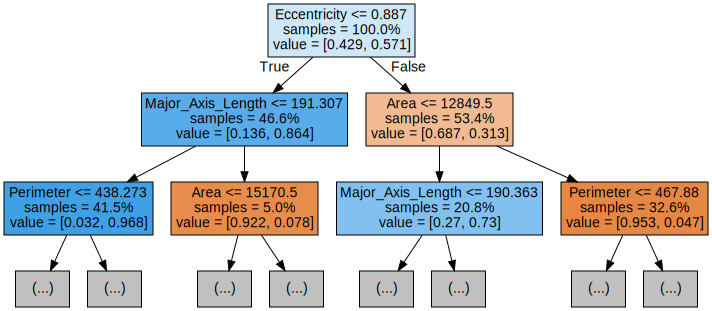

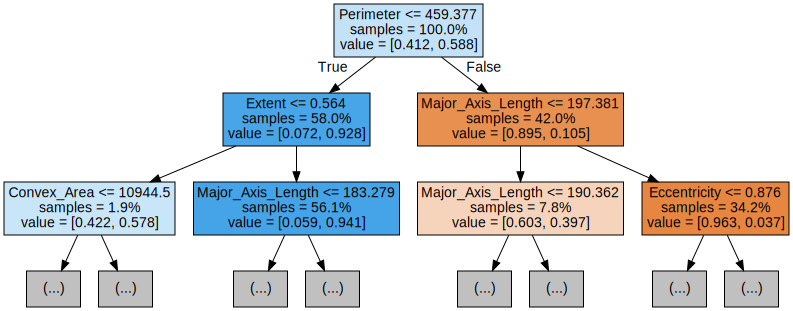

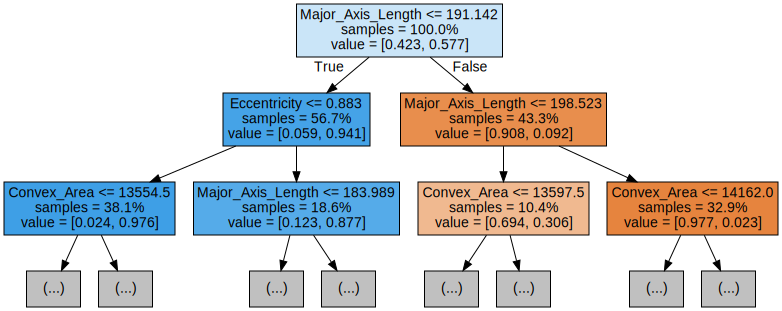

In [ ]:
# Export the first three decision trees from the forest
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(3):
    tree = rf_classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_classifier,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73cce11960>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73cce10c10>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 455}


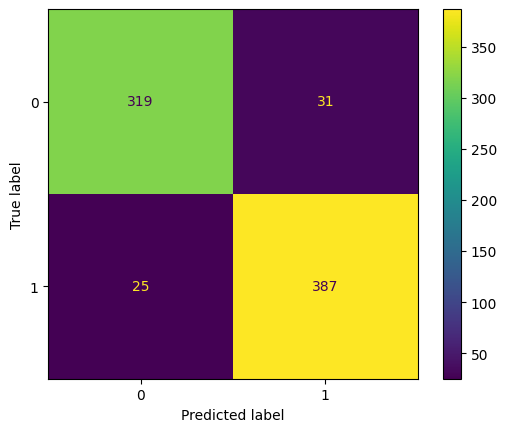

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

y_pred = best_rf.predict(X_test)

# Calculate the evaluation metrics
confusion_mat = confusion_matrix(y_test, y_pred, labels=['Cammeo', 'Osmancik'])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Cammeo')
recall = recall_score(y_test, y_pred, pos_label='Cammeo')
f1 = f1_score(y_test, y_pred, pos_label='Cammeo')

# Print the evaluation metrics
print("Confusion Matrix:\n", confusion_mat)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[319  31]
 [ 25 387]]
Accuracy: 0.926509186351706
Precision: 0.9273255813953488
Sensitivity: 0.9114285714285715
F1 Score: 0.9193083573487031


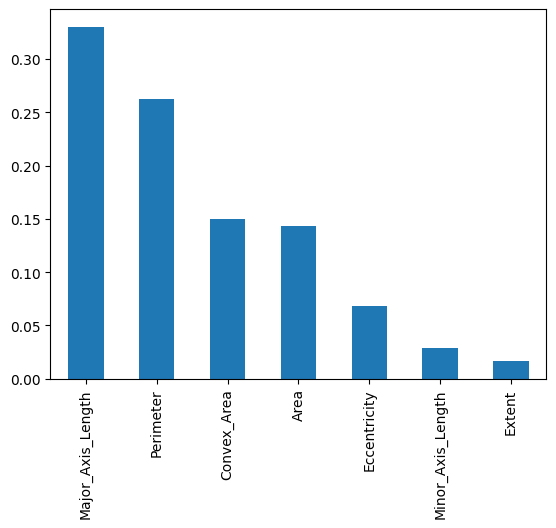

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();